## 선형회귀분석 전 산점도와 기본가정 만족시키기
##### **과정에서 y정규분포에 이상치로 정규분포가 따르지 않음을 발견함/ 그래서 제거하는 과정 포함되어있음**

----

### **<목차>**
1. 정규분포 확인하기
   1) 종속변수가 정규분포를 따르는지?
   2) 독립변수가 정규분포를 따르는지?
   3) 독립변수 종속변수 결합이 정규분포를 따르는지? -> 다변량정규분포
   4) 잔차가 정규분포를 따르는지
2. 선형성확인하기  - 종속변수와 독립변수사이 산점도 찍어보기

-----------

In [301]:
import pandas as pd
import matplotlib.pyplot as plt

In [302]:
# 한글폰트 출력 가능 코드
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### 1. 종속변수 정규성 확인하기

In [303]:
data = pd.read_csv('./dataset/더미생성전_시가총액까지합친거.csv')
data.drop(['Unnamed: 0.1','Unnamed: 0'] , axis = 1 , inplace = True)
data

,날짜,date,년도,월,종가,전월대비 등락률,외국인순매수,개인순매수,기관순매수,요일,동행지수,동행label,등락률label,시가총액대비
0,2005-01-31,2005 01,2005,1,932.700012,0.041053,8538,-9523,984,Monday,99.0,0,1,42.9
1,2005-02-28,2005 02,2005,2,1011.359985,0.084336,14654,-5725,-8928,Monday,98.7,0,1,42.7
2,2005-03-31,2005 03,2005,3,965.679993,-0.045167,-20741,3820,16920,Thursday,98.8,0,0,42.2
3,2005-04-29,2005 04,2005,4,911.299988,-0.056313,-3243,2291,955,Friday,98.6,0,0,41.9
4,2005-05-31,2005 05,2005,5,970.210022,0.064644,1048,-18304,17254,Tuesday,98.7,0,1,41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2021-11-30,2021 11,2021,11,2839.010010,-0.044323,11342,16641,-27380,Tuesday,101.1,1,0,33.0
203,2021-12-30,2021 12,2021,12,2977.649902,0.048834,15250,-30452,15846,Thursday,101.8,1,1,33.5
204,2022-01-28,2022 01,2022,1,2663.340088,-0.105556,-389,12674,6687,Friday,102.4,1,0,32.7
205,2022-02-28,2022 02,2022,2,2699.179932,0.013457,-6207,-10135,-3629,Monday,102.6,1,1,32.4


In [304]:
from scipy.stats import probplot

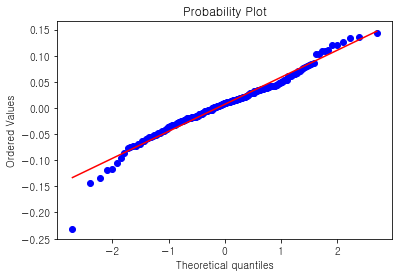

In [305]:
# 전월대비등락률 정규성 검정 (시각화)
probplot(data['전월대비 등락률'],plot=plt) 
plt.show()

In [306]:
# shapiro 검정 시행
from scipy.stats import shapiro
stats, pval = shapiro(data['전월대비 등락률'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(data['전월대비 등락률'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  0.03035980% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.
p값이  0.00000001% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.


#### -> 정규성 안따름 / 그래서 이상치 제거해보려함

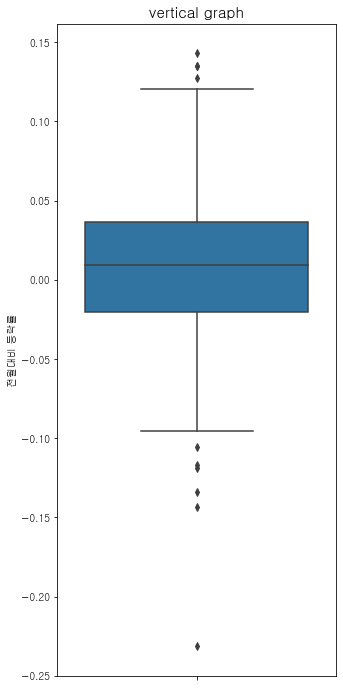

In [307]:
# box-plot 그래프 
plt.figure(figsize = (5,12))
import seaborn as sns

sns.boxplot(y='전월대비 등락률', data = data )
plt.title('vertical graph', size = 15)
plt.show()

In [308]:
import numpy as np
#이상치 제거 함수 get_outlier 만들기

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(data['전월대비 등락률'].values, 25)
  quantile_75 = np.percentile(data['전월대비 등락률'].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = data['전월대비 등락률'][ (data['전월대비 등락률'] < lowest) | (data['전월대비 등락률'] > highest) ].index
  return outlier_idx

In [309]:
# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=data, column='전월대비 등락률', weight=1.5)
data['전월대비 등락률'].loc[outlier_idx]


8      0.127090
36    -0.143612
45    -0.231344
50     0.134737
51     0.135211
79    -0.118647
165   -0.133748
182   -0.116945
190    0.142995
204   -0.105556
Name: 전월대비 등락률, dtype: float64

In [310]:
data.loc[[8,36,45,50,51,79,165,182,190,204]]


,날짜,date,년도,월,종가,전월대비 등락률,외국인순매수,개인순매수,기관순매수,요일,동행지수,동행label,등락률label,시가총액대비
8,2005-09-30,2005 09,2005,9,1221.010010,0.127090,-8341,-9101,17440,Friday,98.7,0,1,41.4
36,2008-01-31,2008 01,2008,1,1624.680054,-0.143612,-49763,17501,67751,Thursday,102.4,1,0,32.3
45,2008-10-31,2008 10,2008,10,1113.060059,-0.231344,-39671,18798,22126,Friday,100.4,1,0,29.8
50,2009-03-31,2009 03,2009,3,1206.260010,0.134737,2047,-6765,12080,Tuesday,97.6,0,1,28.0
51,2009-04-30,2009 04,2009,4,1369.359985,0.135211,34788,13016,-46933,Thursday,97.8,0,1,27.9
79,2011-08-31,2011 08,2011,8,1880.109985,-0.118647,-20552,-4274,17507,Wednesday,101.3,1,0,32.0
165,2018-10-31,2018 10,2018,10,2029.689941,-0.133748,-39888,6876,19492,Wednesday,100.9,1,0,36.7
182,2020-03-31,2020 03,2020,3,1754.640015,-0.116945,-31787,32403,24423,Tuesday,99.0,0,0,37.8
190,2020-11-30,2020 11,2020,11,2591.340088,0.142995,29375,13950,-39295,Monday,99.4,0,1,35.9
204,2022-01-28,2022 01,2022,1,2663.340088,-0.105556,-389,12674,6687,Friday,102.4,1,0,32.7


In [311]:
#이상치있는 행 삭제
data_all_drop = data.drop(outlier_idx, axis=0)
data_all_drop #197행

,날짜,date,년도,월,종가,전월대비 등락률,외국인순매수,개인순매수,기관순매수,요일,동행지수,동행label,등락률label,시가총액대비
0,2005-01-31,2005 01,2005,1,932.700012,0.041053,8538,-9523,984,Monday,99.0,0,1,42.9
1,2005-02-28,2005 02,2005,2,1011.359985,0.084336,14654,-5725,-8928,Monday,98.7,0,1,42.7
2,2005-03-31,2005 03,2005,3,965.679993,-0.045167,-20741,3820,16920,Thursday,98.8,0,0,42.2
3,2005-04-29,2005 04,2005,4,911.299988,-0.056313,-3243,2291,955,Friday,98.6,0,0,41.9
4,2005-05-31,2005 05,2005,5,970.210022,0.064644,1048,-18304,17254,Tuesday,98.7,0,1,41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2021-10-29,2021 10,2021,10,2970.679932,-0.031980,-16287,-7809,22499,Friday,100.9,1,0,32.5
202,2021-11-30,2021 11,2021,11,2839.010010,-0.044323,11342,16641,-27380,Tuesday,101.1,1,0,33.0
203,2021-12-30,2021 12,2021,12,2977.649902,0.048834,15250,-30452,15846,Thursday,101.8,1,1,33.5
205,2022-02-28,2022 02,2022,2,2699.179932,0.013457,-6207,-10135,-3629,Monday,102.6,1,1,32.4


-----------

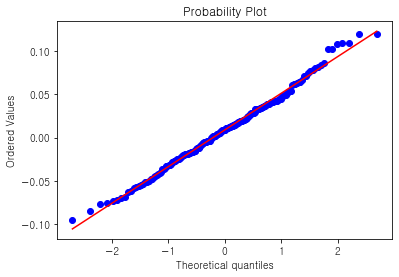

In [312]:
#정규성검증
# 전월대비등락률 정규성 검정 (시각화)
from scipy.stats import probplot

# 시각화 
probplot(data_all_drop['전월대비 등락률'],plot=plt) 
plt.show()

In [313]:
# shapiro 검정 시행
from scipy.stats import shapiro
stats, pval = shapiro(data_all_drop['전월대비 등락률'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(data_all_drop['전월대비 등락률'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  46.81257010% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
p값이  61.20924570% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.


---> 이상치 인덱스 45번 제거하니 정규성 만족!!!!!!

### 인덱스 45행 제거하고 독립변수도 다시 정규성 보기

In [314]:
# 외국인순매수 정규성 검정
# shapiro 검정 시행
from scipy.stats import shapiro
stats, pval = shapiro(data_all_drop['외국인순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(data_all_drop['외국인순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  64.34261799% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
p값이  67.89863512% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.


In [315]:
# 기관순매수 정규성 검정
# shapiro 검정 시행
from scipy.stats import shapiro
stats, pval = shapiro(data_all_drop['기관순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(data_all_drop['기관순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  13.69697005% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
p값이  65.53044209% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.


In [316]:
# 개인순매수 정규성 검정
# shapiro 검정 시행
from scipy.stats import shapiro
stats, pval = shapiro(data_all_drop['개인순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(data_all_drop['개인순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  91.63003564% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
p값이  99.66621815% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.


#### **산점도** 
* 종속변수 - 등락률 과  독립변수 - 외국인/개인/기관 순매수

<Figure size 1080x648 with 0 Axes>

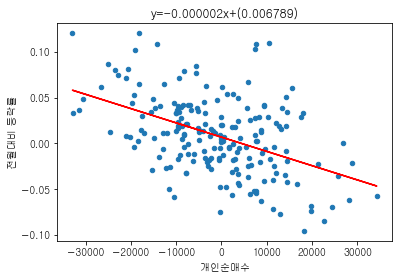

In [317]:
## 개인 - 등락률 산점도

plt.figure(figsize= (15,9))
import numpy as np
data_all_drop.plot(kind='scatter', x='개인순매수', y='전월대비 등락률')
fit_weight = np.polyfit(data_all_drop['개인순매수'], data_all_drop['전월대비 등락률'], 1) # 'avg' 컬럼을 x값으로, 5 컬럼을 y값으로 하여 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)
              
plt.plot(data_all_drop['개인순매수'], trend_f(data_all_drop['개인순매수']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.show()

<Figure size 1080x648 with 0 Axes>

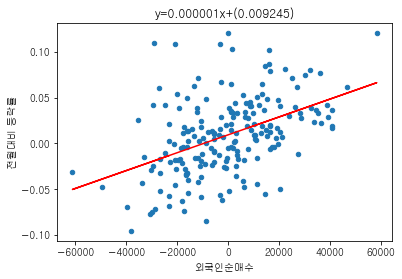

In [318]:
## 외국인 - 등락률 산점도

plt.figure(figsize= (15,9))
import numpy as np
data_all_drop.plot(kind='scatter', x='외국인순매수', y='전월대비 등락률')
fit_weight = np.polyfit(data_all_drop['외국인순매수'], data_all_drop['전월대비 등락률'], 1) # 'avg' 컬럼을 x값으로, 5 컬럼을 y값으로 하여 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)
              
plt.plot(data_all_drop['외국인순매수'], trend_f(data_all_drop['외국인순매수']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.show()

<Figure size 1080x648 with 0 Axes>

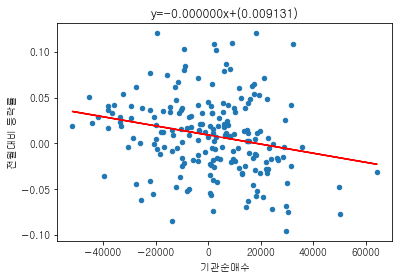

In [319]:
## 기관 - 등락률 산점도

plt.figure(figsize= (15,9))
import numpy as np
data_all_drop.plot(kind='scatter', x='기관순매수', y='전월대비 등락률')
fit_weight = np.polyfit(data_all_drop['기관순매수'], data_all_drop['전월대비 등락률'], 1) # 'avg' 컬럼을 x값으로, 5 컬럼을 y값으로 하여 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)
              
plt.plot(data_all_drop['기관순매수'], trend_f(data_all_drop['기관순매수']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.show()

----

In [320]:
data_all_drop

,날짜,date,년도,월,종가,전월대비 등락률,외국인순매수,개인순매수,기관순매수,요일,동행지수,동행label,등락률label,시가총액대비
0,2005-01-31,2005 01,2005,1,932.700012,0.041053,8538,-9523,984,Monday,99.0,0,1,42.9
1,2005-02-28,2005 02,2005,2,1011.359985,0.084336,14654,-5725,-8928,Monday,98.7,0,1,42.7
2,2005-03-31,2005 03,2005,3,965.679993,-0.045167,-20741,3820,16920,Thursday,98.8,0,0,42.2
3,2005-04-29,2005 04,2005,4,911.299988,-0.056313,-3243,2291,955,Friday,98.6,0,0,41.9
4,2005-05-31,2005 05,2005,5,970.210022,0.064644,1048,-18304,17254,Tuesday,98.7,0,1,41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2021-10-29,2021 10,2021,10,2970.679932,-0.031980,-16287,-7809,22499,Friday,100.9,1,0,32.5
202,2021-11-30,2021 11,2021,11,2839.010010,-0.044323,11342,16641,-27380,Tuesday,101.1,1,0,33.0
203,2021-12-30,2021 12,2021,12,2977.649902,0.048834,15250,-30452,15846,Thursday,101.8,1,1,33.5
205,2022-02-28,2022 02,2022,2,2699.179932,0.013457,-6207,-10135,-3629,Monday,102.6,1,1,32.4


#### **히트맵** 
* 최종 데이터 셋으로 히트맵 다시 돌리기

In [321]:
data_all_drop.columns

Index(['날짜', 'date', '년도', '월', '종가', '전월대비 등락률', '외국인순매수', '개인순매수', '기관순매수',
       '요일', '동행지수', '동행label', '등락률label', '시가총액대비'],
      dtype='object')

<AxesSubplot:>

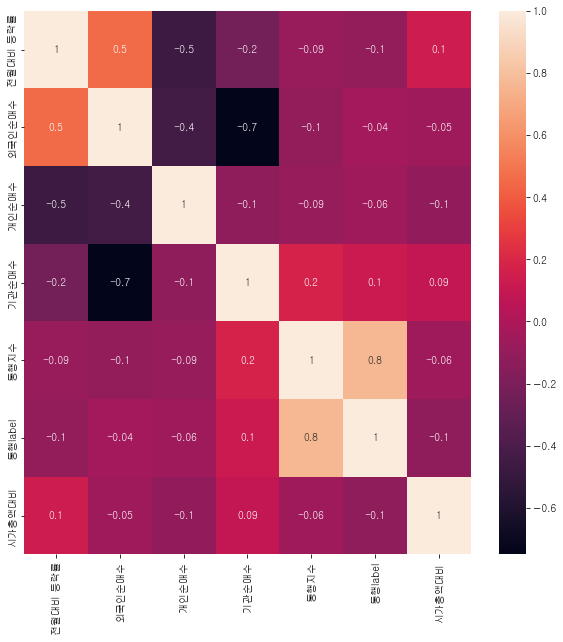

In [322]:
heat=data_all_drop.drop(['날짜',	'date',	'년도',	'월','종가','요일','등락률label'], axis = 1)
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

corr=heat.corr() # 상관관계 리턴 
corr

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt='.1g') 

In [323]:
# data_all_drop.to_csv('코스피등락이상치모두제거.csv')
# data_all_drop

In [324]:
data_all_drop['동행지수']
data_all_drop=pd.DataFrame(data_all_drop)
# data_all_drop.set_index('날짜',inplace=True)
data_all_drop.info()
# data_all_drop['외국인순매수','개인순매수','기관순매수'].astype('float')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 206
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        197 non-null    object 
 1   date      197 non-null    object 
 2   년도        197 non-null    int64  
 3   월         197 non-null    int64  
 4   종가        197 non-null    float64
 5   전월대비 등락률  197 non-null    float64
 6   외국인순매수    197 non-null    int64  
 7   개인순매수     197 non-null    int64  
 8   기관순매수     197 non-null    int64  
 9   요일        197 non-null    object 
 10  동행지수      197 non-null    float64
 11  동행label   197 non-null    int64  
 12  등락률label  197 non-null    int64  
 13  시가총액대비    197 non-null    float64
dtypes: float64(4), int64(7), object(3)
memory usage: 23.1+ KB


In [325]:
data_all_drop = data_all_drop.astype({'외국인순매수':'float','개인순매수':'float','기관순매수':'float', '동행지수':'float64'})
data_all_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 206
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        197 non-null    object 
 1   date      197 non-null    object 
 2   년도        197 non-null    int64  
 3   월         197 non-null    int64  
 4   종가        197 non-null    float64
 5   전월대비 등락률  197 non-null    float64
 6   외국인순매수    197 non-null    float64
 7   개인순매수     197 non-null    float64
 8   기관순매수     197 non-null    float64
 9   요일        197 non-null    object 
 10  동행지수      197 non-null    float64
 11  동행label   197 non-null    int64  
 12  등락률label  197 non-null    int64  
 13  시가총액대비    197 non-null    float64
dtypes: float64(7), int64(4), object(3)
memory usage: 23.1+ KB


In [326]:
data_all_drop.drop(['요일','date','년도','월','종가'],inplace=True,axis=True)

In [327]:
data_all_drop.set_index('날짜',inplace=True)

In [328]:
data_all_drop['동행지수']

날짜
2005-01-31     99.0
2005-02-28     98.7
2005-03-31     98.8
2005-04-29     98.6
2005-05-31     98.7
              ...  
2021-10-29    100.9
2021-11-30    101.1
2021-12-30    101.8
2022-02-28    102.6
2022-03-31    102.4
Name: 동행지수, Length: 197, dtype: float64

In [329]:
# diff를 통해 차분시행 후, 데이터 Nan 값 제거

kospi_diff = data_all_drop.diff(1)['동행지수'].dropna()
kospi_diff = pd.DataFrame(kospi_diff)
print('diff 후 \n', kospi_diff.head())

print('-'*10)
# shift를 통해 1/4일 데이터를 1/5일로 미룸

kospi_shift = data_all_drop['동행지수'].shift(1).dropna()
kospi_shift = pd.DataFrame(kospi_shift)
print('shift 후 \n', kospi_shift.head())

diff 후 
             동행지수
날짜              
2005-02-28  -0.3
2005-03-31   0.1
2005-04-29  -0.2
2005-05-31   0.1
2005-06-30  -0.1
----------
shift 후 
             동행지수
날짜              
2005-02-28  99.0
2005-03-31  98.7
2005-04-29  98.8
2005-05-31  98.6
2005-06-30  98.7
